In [8]:
import os
import matplotlib.pyplot as plt
import json

In [56]:
def barplot_integration_method(ax, x, y, bar_labels, method):
    bar_colors = ["#d9dad9", "#4d4b72", "#fbe4de", "#d3ddf6", "#d9cde3", "#a1d6cc"]
    ax.bar(x,y,label=bar_labels, color=bar_colors)
    ax.set_xticks([])
    ax.set_xlabel(method)
    

In [79]:
src_dir = "/cm/archive/namlh35/SATD/results/my-dataset-0.0.1"
name_template = "{}-{}-concat-kfolds_comment"
src_name_template = "{}-kfold_comment"

methods = ["codebert-base", "graphcodebert-base", "roberta-base", "unixcoder-base"]
method_names = ["CodeBERT", "GraphCodeBERT", "RoBERTa", "UniXCoder"]
contexts = ["code_context_2", "code_context_10", "code_context_20", "full_code"]
labels = ["only comment", "2 lines", "10 lines", "20 lines", "full function", "ensemble"]

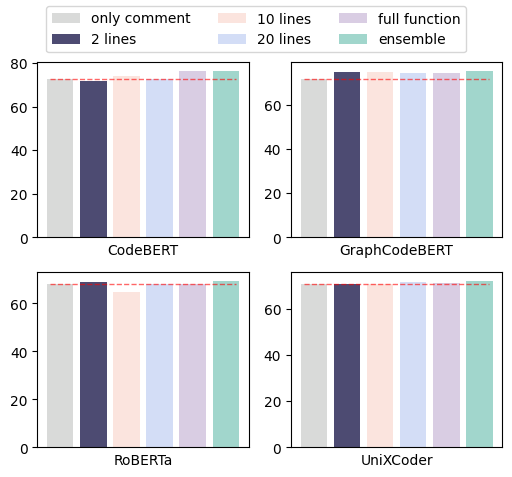

In [82]:
fig, axs = plt.subplots(2,2, figsize=(6,5))

for mid, method in enumerate(methods):
    y = []
    with open(os.path.join(src_dir, src_name_template.format(method.replace("-base", "")), "summary.json"), "r") as f:
            rs = json.load(f)["avg"]["f1_score"] * 100
    y.append(rs)
    axs[mid // 2][mid % 2].plot((-0.3, 5.3), (rs, rs), color="red", linestyle='dashed', alpha=0.6, linewidth=1)

    for context in contexts:
        with open(os.path.join(src_dir, name_template.format(method, context), "summary.json"), "r") as f:
            rs = json.load(f)["avg"]["f1_score"] * 100
        y.append(rs)
    
        if context == "full_code":
            with open(os.path.join(src_dir, name_template.format(method, context), "ensemble.json"), "r") as f:
                rs = json.load(f)["avg"]["f1_score"] * 100
            y.append(rs)
    method_name = method_names[mid]
    barplot_integration_method(axs[mid // 2][mid % 2], labels, y, labels, method_name)

handles, labels = axs[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncols=3)

plt.savefig('strconcat_context.pdf', bbox_inches='tight')

